# Harry Twatter and the chalice of polarity

<img src="polarityseries.jpeg">

## 1. The dataset

In [1]:
def delay_coordinate_embedding(data_file,tau,m):
    time_series_data = np.array([])
    for line in data_file:
        time_series_data = np.append(time_series_data,float(line))
    projection = np.array([])
    for i in np.arange((m-1)*tau,time_series_data.shape[0],1):
        delay_coordinate = np.array([])
        for j in np.arange(0,m*tau,tau):
            delay_coordinate = np.append(delay_coordinate,time_series_data[i-j])
        if(i == (m-1)*tau):
            projection = delay_coordinate
        projection = np.column_stack((projection,delay_coordinate))
    return projection

* Used TISEAN to produce a surrogate timeseries of polarity scores.
* False nearest neighbors gave best dimension as 5
* mutual information gave best tau as 100

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import numpy as np 
df = open("../twitractors/surrogate_polarity_germex.csv",'r')
embedding = delay_coordinate_embedding(df,5,100)
plt.plot(embedding[0,:],embedding[1,:])
plt.show()

## 2. The questions

## 3. The methods

### 3.1 Sentiment Analysis

### 3.2 Delayed Coordinate Embedding (a.k.a. throwing it at TISEAN)

### 3.3 Modeling as a Hidden Markov Model (SFIHMM)

##### Breaking the data into segments: 

* Pre-game
* Beginning of the game to Mexico's goal
* Mexico's goal to end of first half
* Half-time
* Beginning of half-time
* First yellow card to end of game: aka desperation
* Post-game

##### Discretizing polarity scores



In [3]:
#Take a time series of polarity and encode it into a three letter alphabet
# p < -0.25  : 'N' Negative
# -0.25 < p < 0.25 : 'W' Neutral
# p > 0.25 : 'P' Positive
def to_discrete_alphabet(series):
    disc_polarity = []
    for polarity in series: 
        if polarity < -0.25:
            disc_polarity.append('N')
        elif polarity > 0.25:
            disc_polarity.append('P')
        else:
            disc_polarity.append('W')
    return disc_polarity

##### Running it through SFIHMM

The datafile:

<img src='figures/data_for_hmm.png' style="width:500px;height:300px;">

The run attempts:

<img src='figures/attempt_at_hmm.png' style="width:500px;height:300px;">

## 4. Conclusions and future work

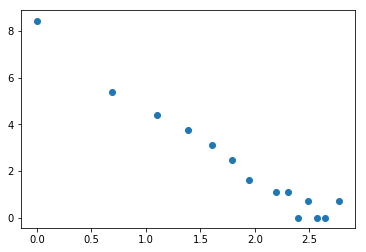

In [4]:
import json 
depth = []
with open ('conversation copy.json') as f:
   for line in f:
       if "depths" in line:
           depth.append(json.loads(line)["depths"])
depths = depth.copy()
depth_counts = {}
for entry in depths:
    length = max(entry)
    if length in depth_counts:
        depth_counts[length] = depth_counts[length] + 1
    else:
        depth_counts[length] = 1

import matplotlib.pyplot as plt
import math
x =  [math.log(i) for i in depth_counts.keys() if i > 0]
y =  [math.log(i) for i in depth_counts.values() if i > 0]
plt.scatter(x,y[1:])
plt.show()